In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def make_data(n=50):
    rng = np.random.RandomState(0)
    X = rng.rand(n, 1) * 10
    err = rng.normal(size=n) * 0.3
    y = np.sin(X).ravel() + err
    return X, y

In [3]:
def plot_data(X, y):
    plt.scatter(X, y, color='k')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

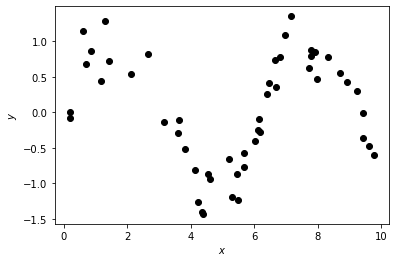

In [4]:
X, y = make_data(50)
plot_data(X, y)
plt.savefig('figures/sin_data.pdf')

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

def RidgePolynomialRegression(degree=10, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('ridge', Ridge(alpha))])

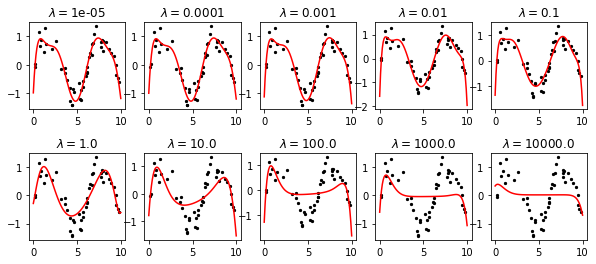

In [6]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
alpha = 0.00001

for ax in axes.flat:
    reg = RidgePolynomialRegression(alpha=alpha)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
    ax.scatter(X, y, color='k', s=5)
    alpha *= 10

plt.savefig('figures/ridge.pdf')

In [7]:
alpha = 0.00001
for i in range(10):
    reg = RidgePolynomialRegression(degree=10, alpha=alpha)
    reg.fit(X, y)
    coef = reg.named_steps['ridge'].coef_[1:]
    print(coef)
    alpha *= 10

[ 2.45811336  5.07749379 -5.06399356 -5.79086794  3.87586275  3.10964014
 -1.32463557 -0.80719897  0.15995294  0.07845666]
[ 2.45003426  5.0488804  -5.01975307 -5.71852554  3.81284185  3.0418889
 -1.29246886 -0.78026437  0.15456612  0.07460127]
[ 2.3796623   4.80023684 -4.63603951 -5.09208282  3.26768116  2.45642586
 -1.01466256 -0.5478251   0.10809414  0.04136073]
[ 2.08199375  3.77382427 -3.08373902 -2.60115876  1.12473195  0.18157403
  0.0577718   0.34173187 -0.06908624 -0.08451899]
[ 1.6461383   2.54407891 -1.5762117  -0.6575335  -0.26159415 -0.99333451
  0.52897486  0.64461632 -0.12137349 -0.11184798]
[ 0.96701995  1.07458368 -0.31639155  0.14799578 -0.23867893 -0.25638155
 -0.00456362 -0.00477542  0.02346869  0.01398101]
[ 0.38811717  0.32322951  0.04661653  0.18997522 -0.06103618  0.04841547
 -0.08149436 -0.08424857  0.01752565  0.0108085 ]
[ 0.07302939  0.06003444  0.02638145  0.05437841  0.00729324  0.04498149
 -0.00546776  0.02389135 -0.01319033 -0.01824813]
[ 0.00767524  0.0

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polyfeatures__degree': np.arange(1, 11),
    'ridge__alpha': np.logspace(-5, 4, num=10)
}

grid = GridSearchCV(RidgePolynomialRegression(), param_grid, n_jobs=-1)
grid.fit(X, y)

print(grid.best_params_)

{'polyfeatures__degree': 8, 'ridge__alpha': 0.01}
